In [ ]:
# Data Collection
import pandas_datareader as pdr

In [ ]:
api_key = "get your key from Tiingo Documentation"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=api_key)
df.head()

In [ ]:
df.to_csv('data/AAPL.csv')

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-05 00:00:00+00:00,93.24,94.07,92.68,94.00,35890500,21.809581,22.003724,21.678592,21.987351,143562000,0.57,1.0
1,AAPL,2016-05-06 00:00:00+00:00,92.72,93.45,91.85,93.37,43699886,21.687949,21.858701,21.484449,21.839989,174799544,0.00,1.0
2,AAPL,2016-05-09 00:00:00+00:00,92.79,93.77,92.59,93.00,32936436,21.704322,21.933552,21.657541,21.753443,131745744,0.00,1.0
3,AAPL,2016-05-10 00:00:00+00:00,93.42,93.57,92.11,93.33,33686836,21.851684,21.886770,21.545265,21.830632,134747344,0.00,1.0
4,AAPL,2016-05-11 00:00:00+00:00,92.51,93.57,92.46,93.48,28719109,21.638828,21.886770,21.627132,21.865719,114876436,0.00,1.0


In [3]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-27 00:00:00+00:00,134.39,135.41,134.110,135.01,66015804,134.39,135.41,134.110,135.01,66015804,0.0,1.0
1253,AAPL,2021-04-28 00:00:00+00:00,133.58,135.02,133.080,134.31,107760097,133.58,135.02,133.080,134.31,107760097,0.0,1.0
1254,AAPL,2021-04-29 00:00:00+00:00,133.48,137.07,132.450,136.47,151100953,133.48,137.07,132.450,136.47,151100953,0.0,1.0
1255,AAPL,2021-04-30 00:00:00+00:00,131.46,133.56,131.065,131.78,109839466,131.46,133.56,131.065,131.78,109839466,0.0,1.0
1256,AAPL,2021-05-03 00:00:00+00:00,132.54,134.07,131.830,132.04,75135100,132.54,134.07,131.830,132.04,75135100,0.0,1.0


In [4]:
df.shape

(1257, 14)

In [5]:
df.isna().sum(axis=0)

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
closing_price = df.close.copy()

In [7]:
closing_price.head()

0    93.24
1    92.72
2    92.79
3    93.42
4    92.51
Name: close, dtype: float64

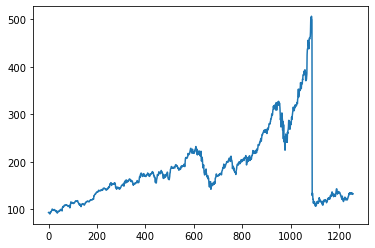

In [8]:
import matplotlib.pyplot as plt
plt.plot(closing_price)

In [9]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
#instantiate
minmax_scaler = MinMaxScaler()

In [11]:
closing_price_s = minmax_scaler.fit_transform(np.array(closing_price).reshape(-1, 1))

In [12]:
max(closing_price_s), min(closing_price_s)

(array([1.]), array([0.]))

In [13]:
# splitting dataset into train and test split
training_size = int(len(closing_price_s) * 0.65)
test_size = len(closing_price_s) - training_size
train_data, test_data = closing_price_s[0:training_size, :], closing_price_s[training_size:, :]

In [14]:
training_size, test_size

(817, 440)

In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
# creating dependent and independent features for train and test data
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [31]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [32]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [34]:
X_train.shape, X_test.shape

((716, 100, 1), (339, 100, 1))

### Creating the model

In [35]:
#tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [36]:
#instansiate in deep learning includes two steps
#define the model model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
# fit the model
r = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 9s 312ms/step - loss: 0.0226 - val_loss: 0.0529
Epoch 2/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0035 - val_loss: 0.0296
Epoch 3/100
12/12 [==============================] - 2s 138ms/step - loss: 0.0017 - val_loss: 0.0271
Epoch 4/100
12/12 [==============================] - 2s 152ms/step - loss: 7.6143e-04 - val_loss: 0.0200
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 4.2964e-04 - val_loss: 0.0204
Epoch 6/100
12/12 [==============================] - 2s 142ms/step - loss: 4.0836e-04 - val_loss: 0.0189
Epoch 7/100
12/12 [==============================] - 2s 129ms/step - loss: 3.7746e-04 - val_loss: 0.0185
Epoch 8/100
12/12 [==============================] - 2s 141ms/step - loss: 4.0056e-04 - val_loss: 0.0184
Epoch 9/100
12/12 [==============================] - 1s 125ms/step - loss: 3.2365e-04 - val_loss: 0.0179
Epoch 10/100
12/12 [==============================] - 2s 134ms/step

12/12 [==============================] - 2s 141ms/step - loss: 1.6176e-04 - val_loss: 0.0088
Epoch 79/100
12/12 [==============================] - 2s 146ms/step - loss: 1.2717e-04 - val_loss: 0.0085
Epoch 80/100
12/12 [==============================] - 2s 146ms/step - loss: 1.2568e-04 - val_loss: 0.0083
Epoch 81/100
12/12 [==============================] - 2s 141ms/step - loss: 1.2991e-04 - val_loss: 0.0086
Epoch 82/100
12/12 [==============================] - 2s 141ms/step - loss: 1.3914e-04 - val_loss: 0.0083
Epoch 83/100
12/12 [==============================] - 2s 141ms/step - loss: 1.2357e-04 - val_loss: 0.0080
Epoch 84/100
12/12 [==============================] - 2s 147ms/step - loss: 1.2632e-04 - val_loss: 0.0080
Epoch 85/100
12/12 [==============================] - 2s 151ms/step - loss: 1.3796e-04 - val_loss: 0.0083
Epoch 86/100
12/12 [==============================] - 2s 152ms/step - loss: 1.3138e-04 - val_loss: 0.0078
Epoch 87/100
12/12 [==============================] - 2s 14

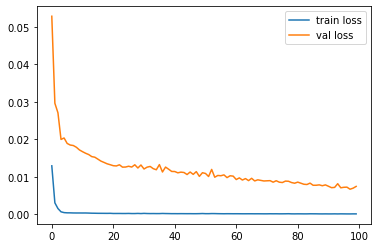

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [47]:
# prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [48]:
# Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error

In [49]:
np.sqrt(mean_squared_error(y_train,train_predict))

0.010806209925013218

In [50]:
np.sqrt(mean_squared_error(y_test,test_predict))

0.08630633056690251

In [54]:
# we had used minmax scaler and so we need to 
# transform the data back to original form
train_predict = minmax_scaler.inverse_transform(train_predict)
test_predict = minmax_scaler.inverse_transform(test_predict)

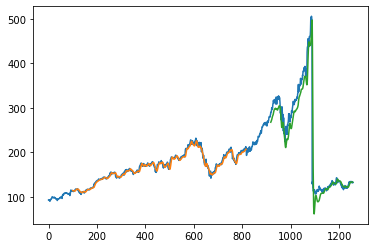

In [55]:
# Plotting

# plotting complete True data
plt.plot(minmax_scaler.inverse_transform(closing_price_s))

# shift train predictions for plotting
train_predict_plot = np.empty_like(closing_price_s)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
plt.plot(train_predict_plot)

# shift test predictions for plotting
test_predict_plot = np.empty_like(closing_price_s)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(closing_price_s)-1, :] = test_predict
plt.plot(test_predict_plot)

plt.show()

### Predicting next 30 days:

In [83]:
len(test_data)

440

In [84]:
tmp_input = test_data[340:]
tmp_input.shape

(100, 1)

In [85]:
#demonstrate prediction for next 30 days

temp_input = list(tmp_input.reshape(-1))
x_input = tmp_input
lstm_output = []
i = 0

while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, time_step, 1))
        y_hat = model.predict(x_input)
        temp_input.append(y_hat[0][0])
        temp_input=temp_input[1:]
        lstm_output.append(y_hat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step, 1))
        y_hat = model.predict(x_input, verbose=0)
        temp_input.append(y_hat[0][0])
        lstm_output.append(y_hat[0][0])
        i = i + 1
    
print(lstm_output)

[0.102637485, 0.1022592, 0.10203089, 0.10194958, 0.10198331, 0.102097325, 0.102263905, 0.10246357, 0.10268337, 0.102914415, 0.1031505, 0.103386864, 0.103619814, 0.10384659, 0.104065105, 0.10427413, 0.104473, 0.10466166, 0.10484057, 0.10501044, 0.10517232, 0.105327286, 0.10547655, 0.105621286, 0.105762556, 0.10590141, 0.10603868, 0.10617509, 0.106311224, 0.106447525]


In [86]:
lstm_output = np.array(lstm_output).reshape(-1, 1)
lstm_output[0:10]

array([[0.10263748],
       [0.1022592 ],
       [0.10203089],
       [0.10194958],
       [0.10198331],
       [0.10209733],
       [0.10226391],
       [0.10246357],
       [0.10268337],
       [0.10291442]], dtype=float32)

### Visualising the output

In [87]:
known_days = np.arange(1,101)
predicted_days = np.arange(101,131)

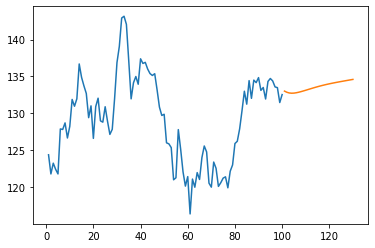

In [88]:
plt.plot(known_days, minmax_scaler.inverse_transform(tmp_input))
plt.plot(predicted_days, minmax_scaler.inverse_transform(lstm_output))